<a href="https://colab.research.google.com/github/TRANQUOCHUY202/AI/blob/main/nhandang-dudoantuonglai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BT1/Name_class/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 1033 images belonging to 18 classes.


In [ ]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BT1/Name_class/Test', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')
training_set.class_indices
test_set.class_indices

Found 54 images belonging to 18 classes.


{'Binh': 0,
 'Chi': 1,
 'Chuong': 2,
 'Dong': 3,
 'DuyThanh': 4,
 'Hieu': 5,
 'MinhPhi': 6,
 'Nam': 7,
 'NhatHuy': 8,
 'Phong': 9,
 'QuocHuy': 10,
 'TanPhi': 11,
 'Thang': 12,
 'Tien': 13,
 'Tri': 14,
 'Tu': 15,
 'Tuan': 16,
 'Tung': 17}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(18, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 15, 20, 64)        36928     
                                                     

In [ ]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [ ]:
# Huấn luyện mô hình
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set))

<ipython-input-81-e3a0f90c012f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set),


Epoch 1/80
33/33 [==============================] - 18s 543ms/step - loss: 2.5486e-06 - accuracy: 1.0000 - val_loss: 3.4799 - val_accuracy: 0.7778
Epoch 2/80
33/33 [==============================] - 17s 519ms/step - loss: 2.3253e-06 - accuracy: 1.0000 - val_loss: 4.3851 - val_accuracy: 0.7222
Epoch 3/80
33/33 [==============================] - 17s 516ms/step - loss: 2.3310e-06 - accuracy: 1.0000 - val_loss: 5.2258 - val_accuracy: 0.6481
Epoch 4/80
33/33 [==============================] - 17s 510ms/step - loss: 2.1987e-06 - accuracy: 1.0000 - val_loss: 3.7412 - val_accuracy: 0.7222
Epoch 5/80
33/33 [==============================] - 19s 567ms/step - loss: 2.1240e-06 - accuracy: 1.0000 - val_loss: 3.9735 - val_accuracy: 0.6852
Epoch 6/80
33/33 [==============================] - 17s 518ms/step - loss: 2.1233e-06 - accuracy: 1.0000 - val_loss: 2.0286 - val_accuracy: 0.8333
Epoch 7/80
33/33 [==============================] - 17s 508ms/step - loss: 2.1551e-06 - accuracy: 1.0000 - val_loss: 4

In [ ]:
# đánh giá mô hình
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 4.561691761016846
Test accuracy: 0.7037037014961243


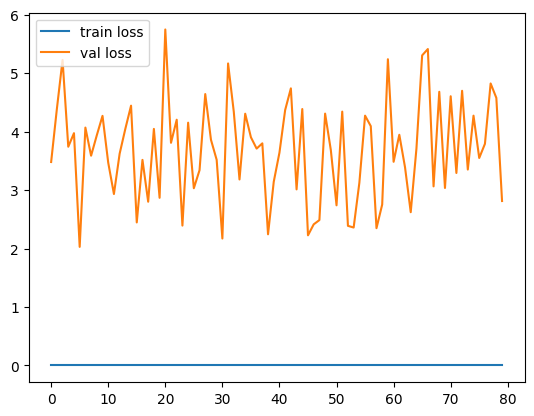

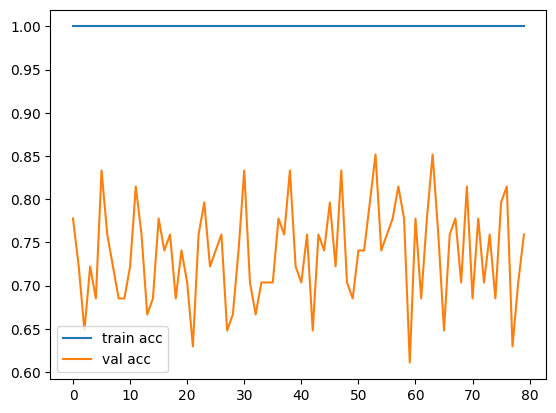

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('/content/drive/MyDrive/BT1/Name_class/model_name.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/BT1/Name_class/model_name.h5')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/BT1/Name_class/Valid')

Chọn image : Anh1
1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Đây là: TanPhi
Tương lai sẽ có nha to, xe sang
Chọn image : Anh19
1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Đây là: QuocHuy
Tương lai sẽ là nhà lãnh đạo xuất chúng
Chọn image : Anh17
1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Đây là: Tien
Tương lai sẽ đặt giải nobel
Chọn image : -


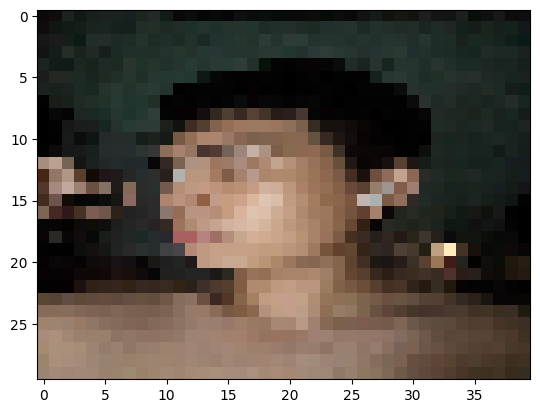

In [ ]:
import numpy as np
from keras.preprocessing import image

while 1 :
 ch = input('Chọn' ' image : ')
   
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/BT1/Name_class/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     
     x=0
     c=0
     i=0

     while (i<18):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c>=18) :
         c=18
     if c == 0:
       prediction = 'Đây là: Binh'
       prediction1 = 'Tương lai sẽ là một kỹ sư giỏi'
     elif c == 1:
       prediction = 'Đây là: Chi'
       prediction1 = 'Tương lai sẽ có một vợ hai con'
     elif c == 2:
       prediction1 = 'Đây là: Chuong'
       prediction1 = 'Tương lai sẽ rất thành công '
     elif c == 3:
       prediction = 'Đây là: Dong'
       prediction1 = 'Tương lai sẽ là một nhà tỷ phú'
     elif c == 4:
       prediction = 'Đây là: DuyThanh'
       prediction1 = 'Tương lai sẽ làm chủ tịch'
     elif c == 5:
       prediction ='Đây là: Hieu'
       prediction1 = 'Tương lai sẽ là một daonh nhan'
     elif c == 6:
       prediction = 'Đây là: MinhPhi'
       prediction1 = 'Tương lai sẽ có một cuộc sống nhiều người mơ ước'
     elif c == 7:
       prediction = 'Đây là: Nam'
       prediction1 = 'Tương lai sẽ có một căn biệt thự'
     elif c == 8:
       prediction = 'Đây là: NhatHuy'
       prediction1 = 'Tương lai sẽ có siêu xe'
     elif c==9:
       prediction ='Đây là: Phong'
       prediction1 = 'Tương lai sẽ có máy bay riêng'
     elif c==10:
       prediction ='Đây là: QuocHuy'
       prediction1 = 'Tương lai sẽ là nhà lãnh đạo xuất chúng'
     elif c==11:
        prediction ='Đây là: TanPhi'
        prediction1 = 'Tương lai sẽ có nha to, xe sang'
     elif c==12:
        prediction ='Đây là: Thang'
        prediction1 = 'Tương lai sẽ một người chông tốt'
     elif c==13:
        prediction ='Đây là: Tien'
        prediction1 = 'Tương lai sẽ đặt giải nobel'
     elif c==14:
        prediction ='Đây là: Tri'
        prediction1 = 'Tương lai sẽ là người có nhiều tiền'
     elif c==15:
        prediction ='Đây là: Tu'
        prediction1 = 'Tương lai sẽ một lực sĩ'
     elif c==16:
        prediction ='Đây là: Tuan'
        prediction1 = 'Tương lai sẽ có nhiều người yêu'
     elif c==17:
        prediction ='Đây là: Tung'
        prediction1 = 'Tương lai sẽ là chủ của Grab'
   
     print(prediction)
     print(prediction1)
   except:
      print('Tên của hình ảnh không tồn tại '  )
